In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: <object object at 0x000002680AC3B4A0>


In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [91]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [93]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

##### To remove the duplicate rows, use the drop_duplicates()

In [96]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [97]:
# stats of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### exploring data

In [100]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [101]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [102]:
# define numerical and categorical
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print cols
print('{} numerical features: {}'.format(len(numeric_features), numeric_features))
print('{} categorical features: {}'.format(len(categorical_features), categorical_features))

3 numerical features: ['math score', 'reading score', 'writing score']
5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [103]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


#### Adding columns for "Total Score" and "Average"

In [105]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### total score and average  will be dependent and other all will be independent

In [107]:
reading_full = df['reading score'] == 100
print(reading_full)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: reading score, Length: 1000, dtype: bool


In [108]:
reading_full = df[df['reading score'] == 100]
print(reading_full)

     gender race/ethnicity parental level of education         lunch  \
106  female        group D             master's degree      standard   
114  female        group E           bachelor's degree      standard   
149    male        group E          associate's degree  free/reduced   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
381    male        group C          associate's degree      standard   
458  female        group E           bachelor's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/reduced   
594  female        group C           bachelor's degree      standard   
712  female        group D                some college      standard   
886  female        group E          associate's degree      standard   
903  female        group D           bachelor's degree  free/red

##### First Code: Counts non-null values in a specific column (average) after filtering.
##### Second Code: Counts non-null values in all columns after filtering, returning a count for each column as a Pandas Series

In [110]:
reading_full = df[df['reading score'] == 100]['average'].count()
print(reading_full)

reading_full = df[df['reading score'] == 100].count()
print(reading_full)

17
gender                         17
race/ethnicity                 17
parental level of education    17
lunch                          17
test preparation course        17
math score                     17
reading score                  17
writing score                  17
total score                    17
average                        17
dtype: int64


##### now we find scores <=20 and ==100 for reading score writing and math

In [112]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
print(str(reading_full)+" "+str(writing_full)+ " "+str(math_full))

17 14 7


In [113]:
type(reading_full)

numpy.int64

In [114]:
reading_full = df[df['reading score'] <= 20]['average'].count()
writing_full = df[df['writing score'] <= 20]['average'].count()
math_full = df[df['math score'] <= 20]['average'].count()
print(str(reading_full)+" "+str(writing_full)+ " "+str(math_full))

1 3 4


##### students have performed worst in math and best in reading

#### Exploring Data
##### Visualise avg score distribution

<Axes: xlabel='average', ylabel='Count'>

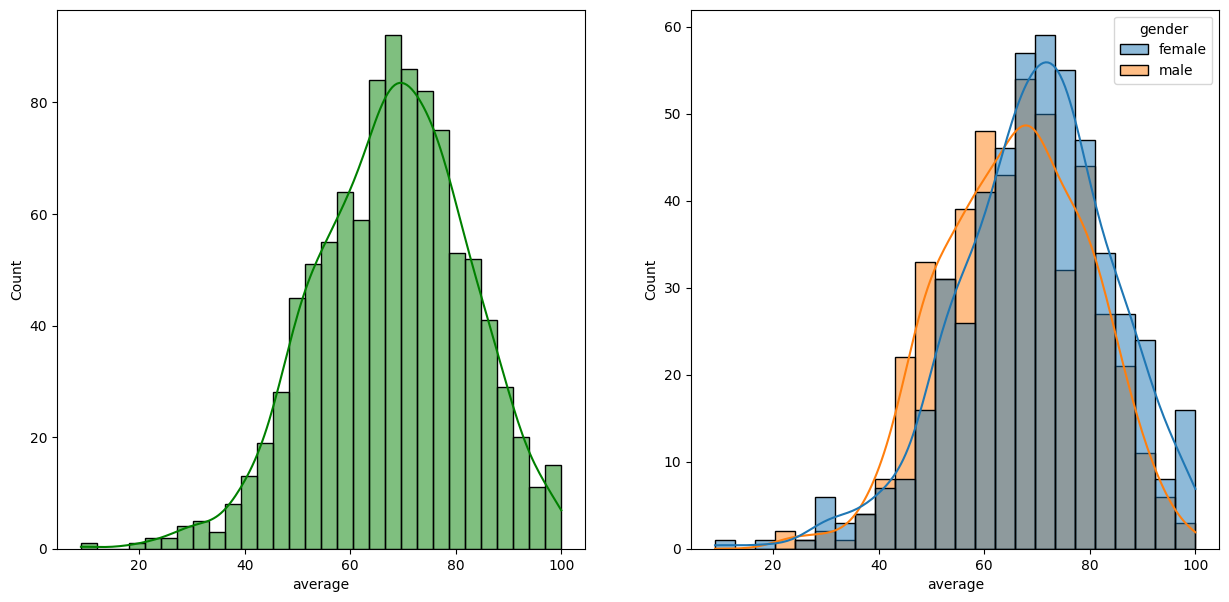

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

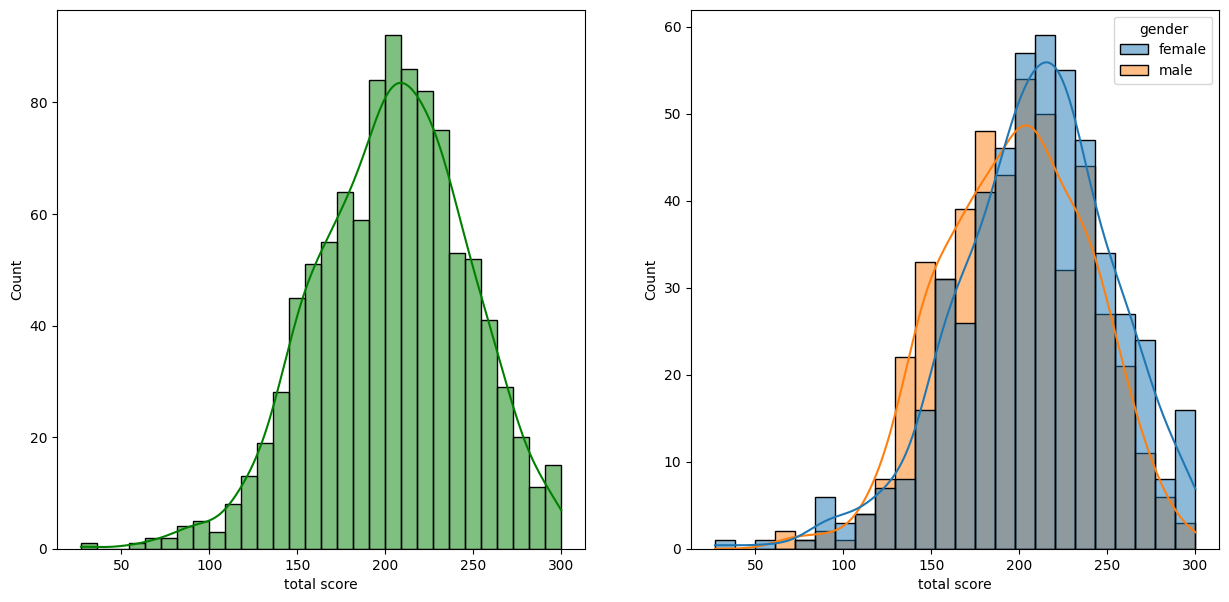

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')


##### Female students perform better than male.

<Axes: xlabel='average', ylabel='Count'>

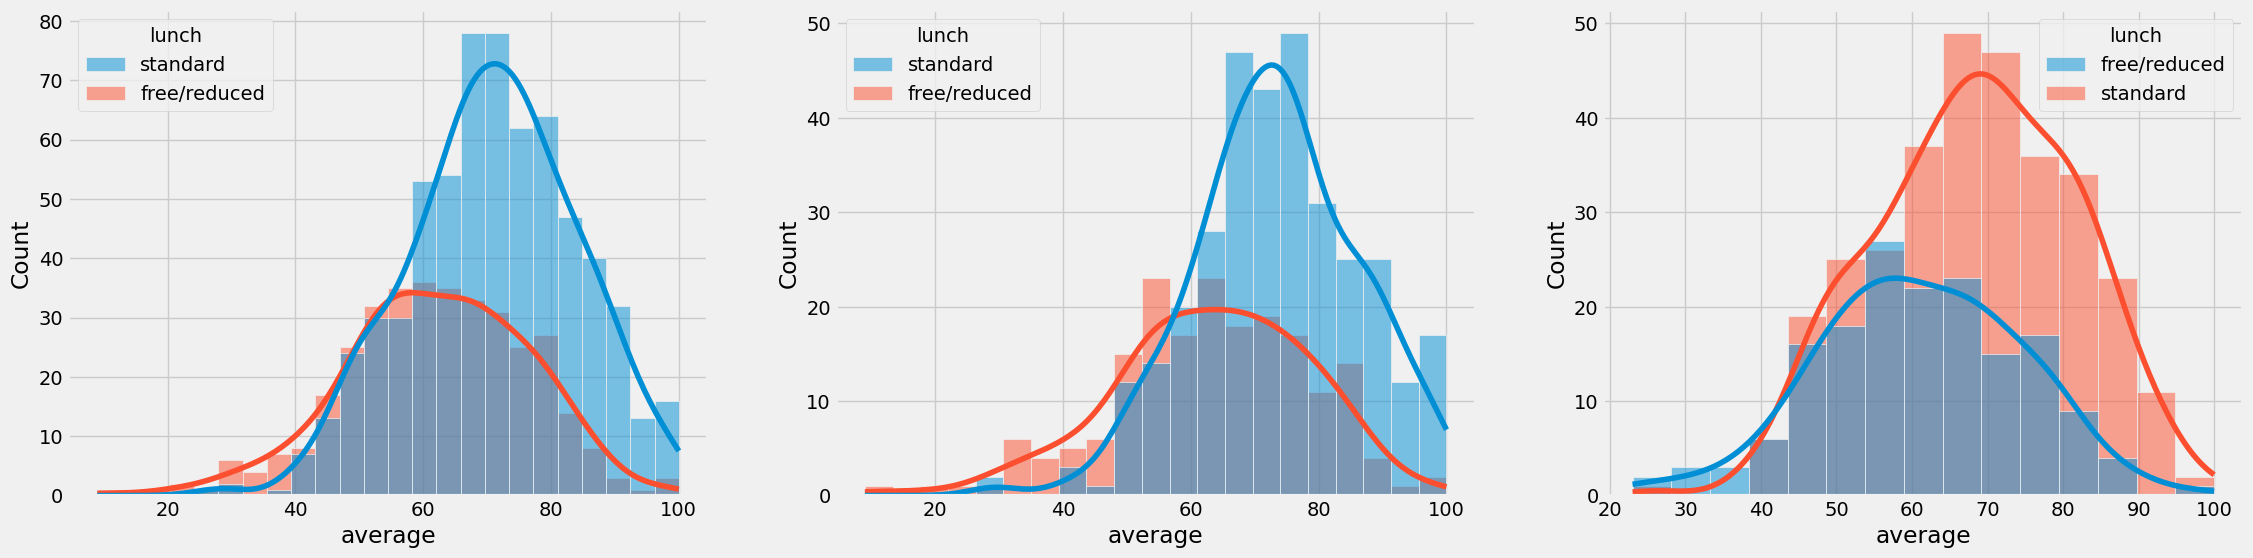

In [276]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

##### 1. Standard lunch helps perfprm well in exams.
##### 2. Doesn't matter be it a male or female.

<Axes: xlabel='average', ylabel='Count'>

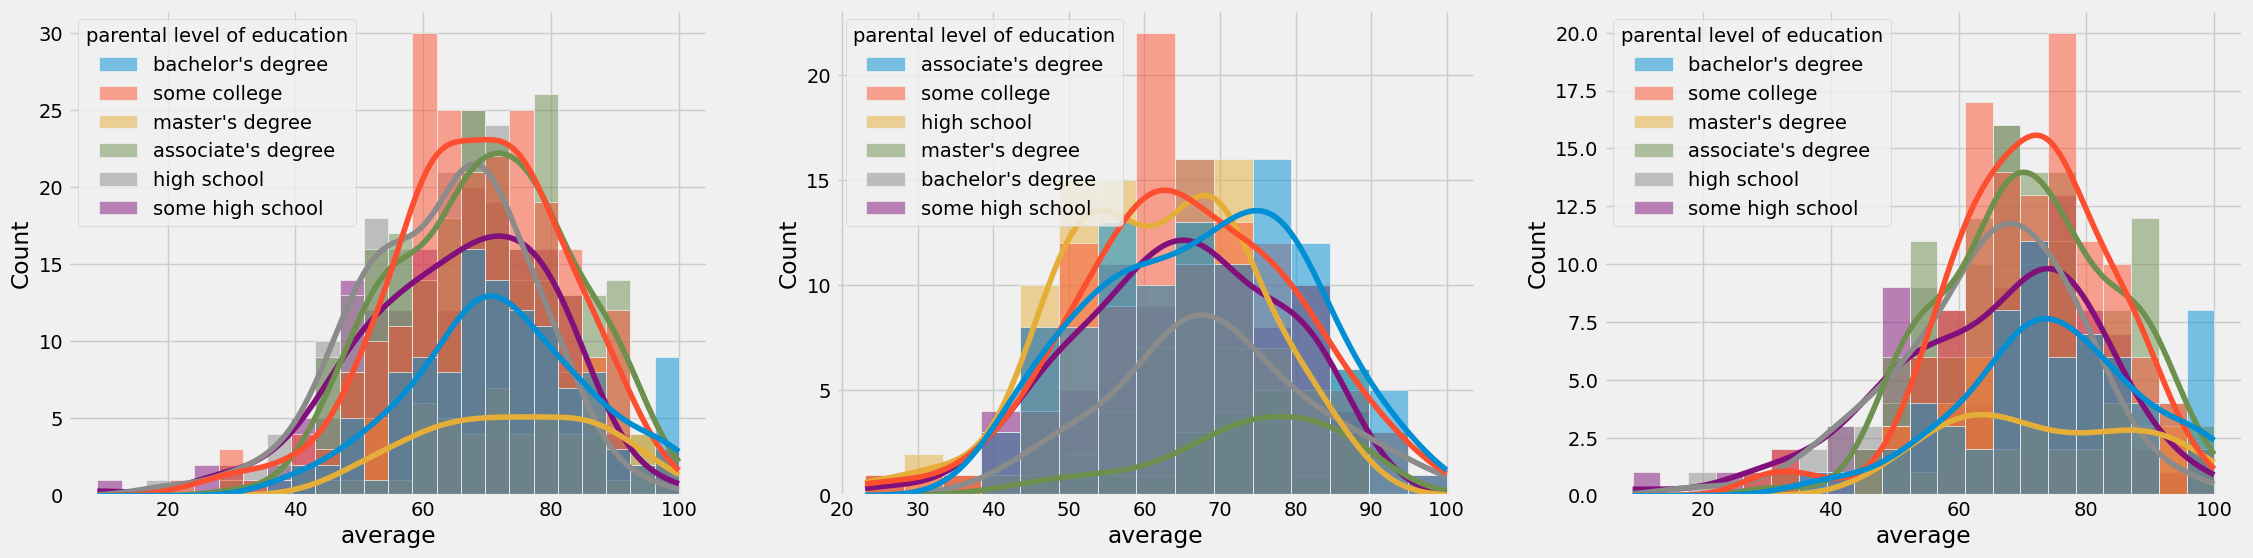

In [278]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')


<Axes: xlabel='average', ylabel='Count'>

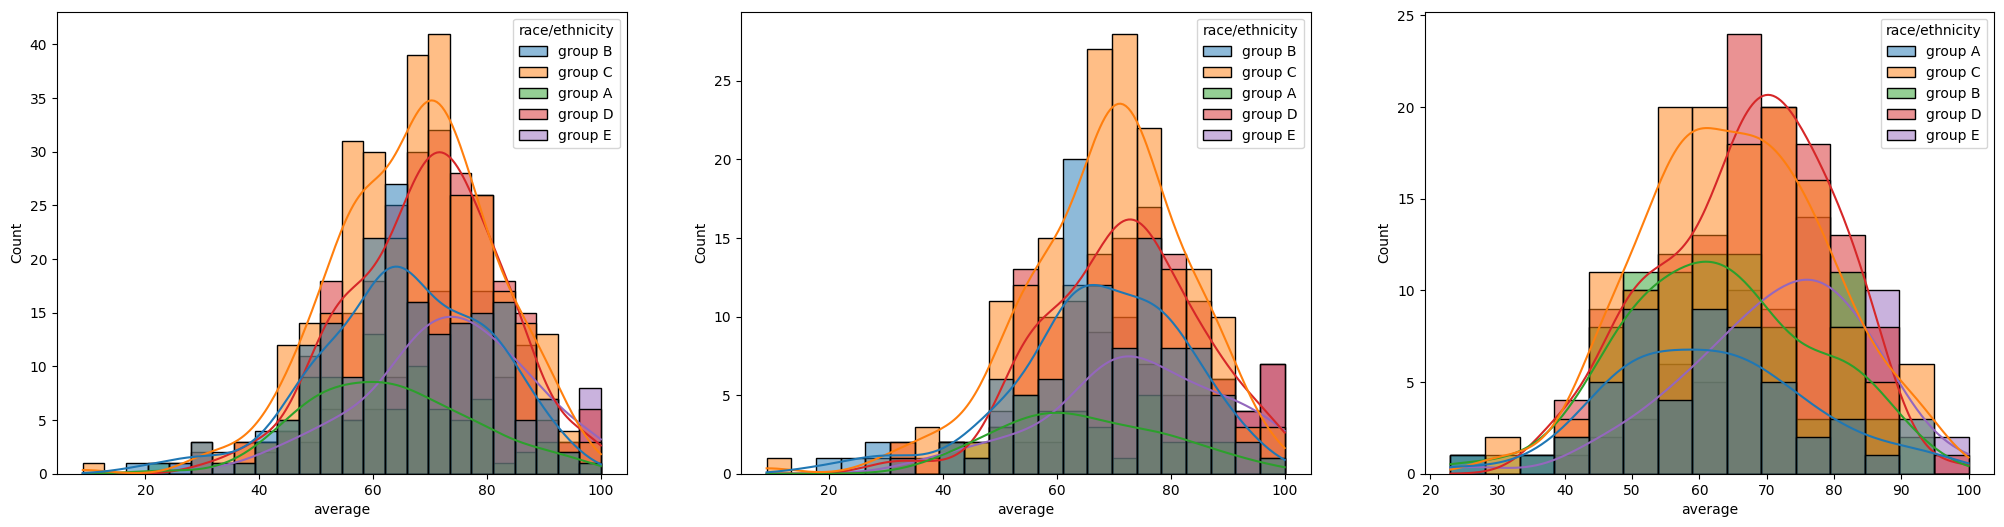

In [124]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'] , x='average', kde=True, hue='race/ethnicity')

##### Compare the KDE Curves: By comparing the KDE curves across different subplots, you can identify which group has the distribution shifted 
##### toward higher average scores.
##### Peak Location: The group with the peak furthest to the right likely performed the best.

<Axes: xlabel='average', ylabel='Count'>

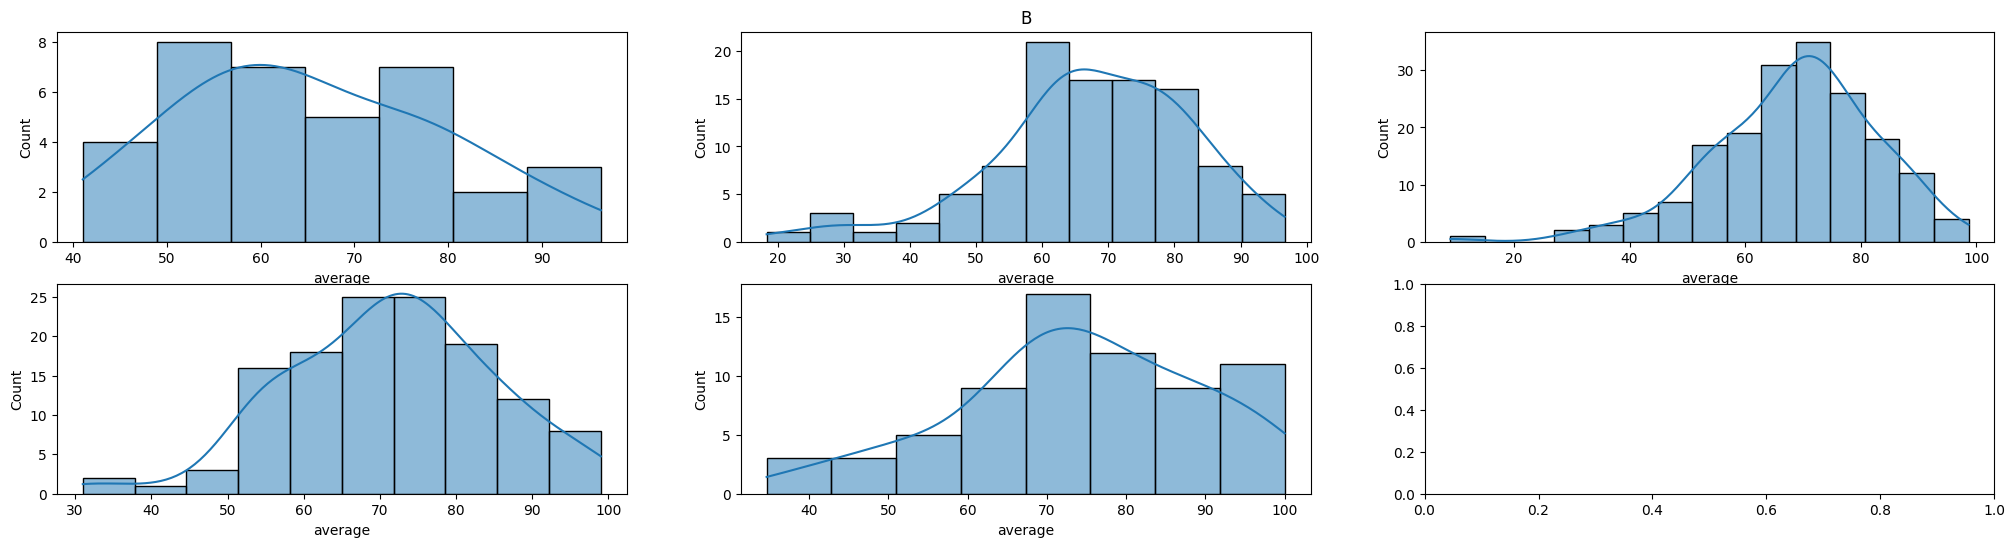

In [37]:
plt.subplots(2, 3, figsize=(25,6))
plt.subplot(231)
sns.histplot(data=df[(df.gender == 'female') & (df['race/ethnicity'] == 'group A')], x='average', kde=True)
plt.subplot(232)
plt.title('B')
sns.histplot(data=df[(df.gender == 'female') & (df['race/ethnicity'] == 'group B')], x='average', kde=True)
plt.subplot(233)
sns.histplot(data=df[(df.gender == 'female') & (df['race/ethnicity'] == 'group C')], x='average', kde=True)
plt.subplot(234)
sns.histplot(data=df[(df.gender == 'female') & (df['race/ethnicity'] == 'group D')], x='average', kde=True)
plt.subplot(235)
sns.histplot(data=df[(df.gender == 'female') & (df['race/ethnicity'] == 'group E')], x='average', kde=True)

##### Group A and B have lower averages.

<Axes: xlabel='average', ylabel='Count'>

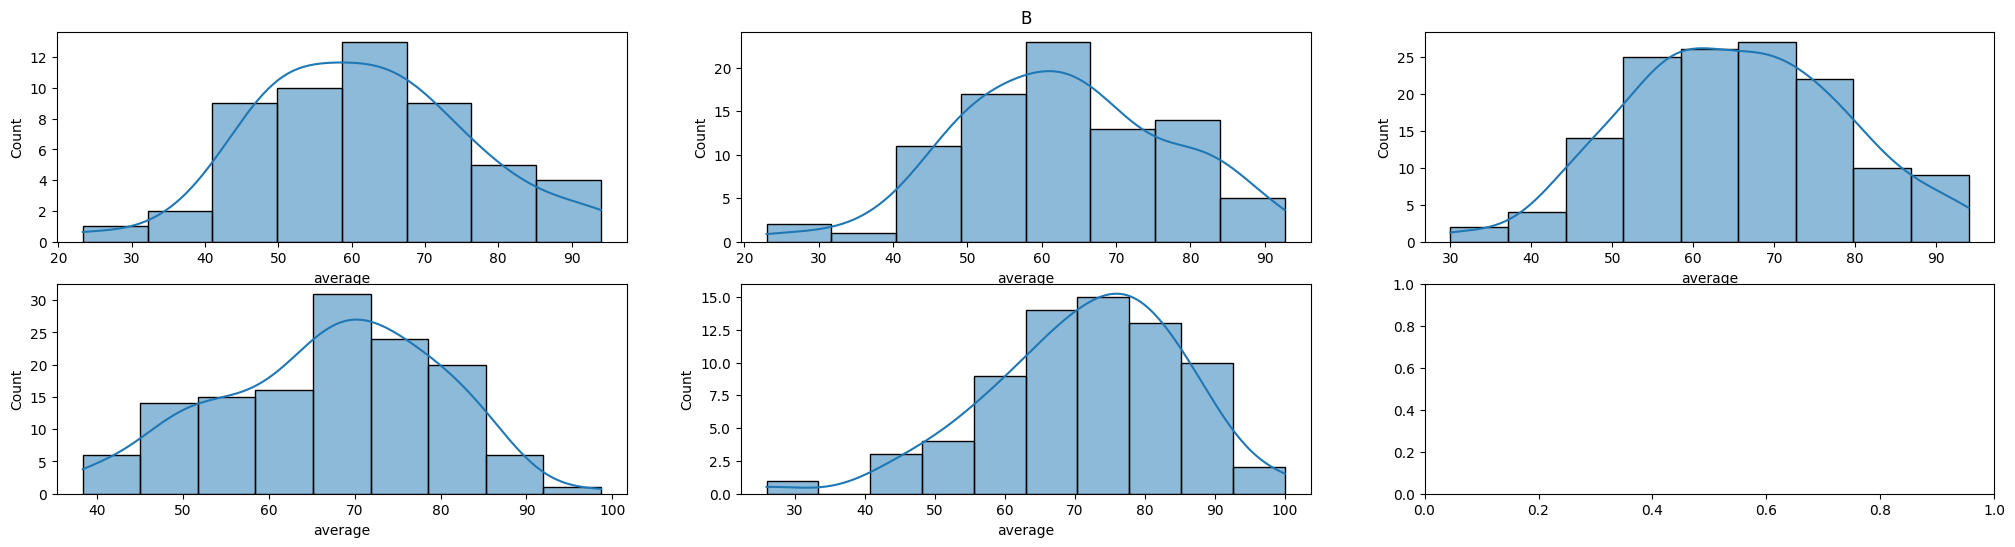

In [39]:
plt.subplots(2, 3, figsize=(25,6))
plt.subplot(231)
sns.histplot(data=df[(df.gender == 'male') & (df['race/ethnicity'] == 'group A')], x='average', kde=True)
plt.subplot(232)
plt.title('B')
sns.histplot(data=df[(df.gender == 'male') & (df['race/ethnicity'] == 'group B')], x='average', kde=True)
plt.subplot(233)
sns.histplot(data=df[(df.gender == 'male') & (df['race/ethnicity'] == 'group C')], x='average', kde=True)
plt.subplot(234)
sns.histplot(data=df[(df.gender == 'male') & (df['race/ethnicity'] == 'group D')], x='average', kde=True)
plt.subplot(235)
sns.histplot(data=df[(df.gender == 'male') & (df['race/ethnicity'] == 'group E')], x='average', kde=True)

##### Same A and B lower avg

#### Max score of students in all three subjects.

<Axes: ylabel='writing score'>

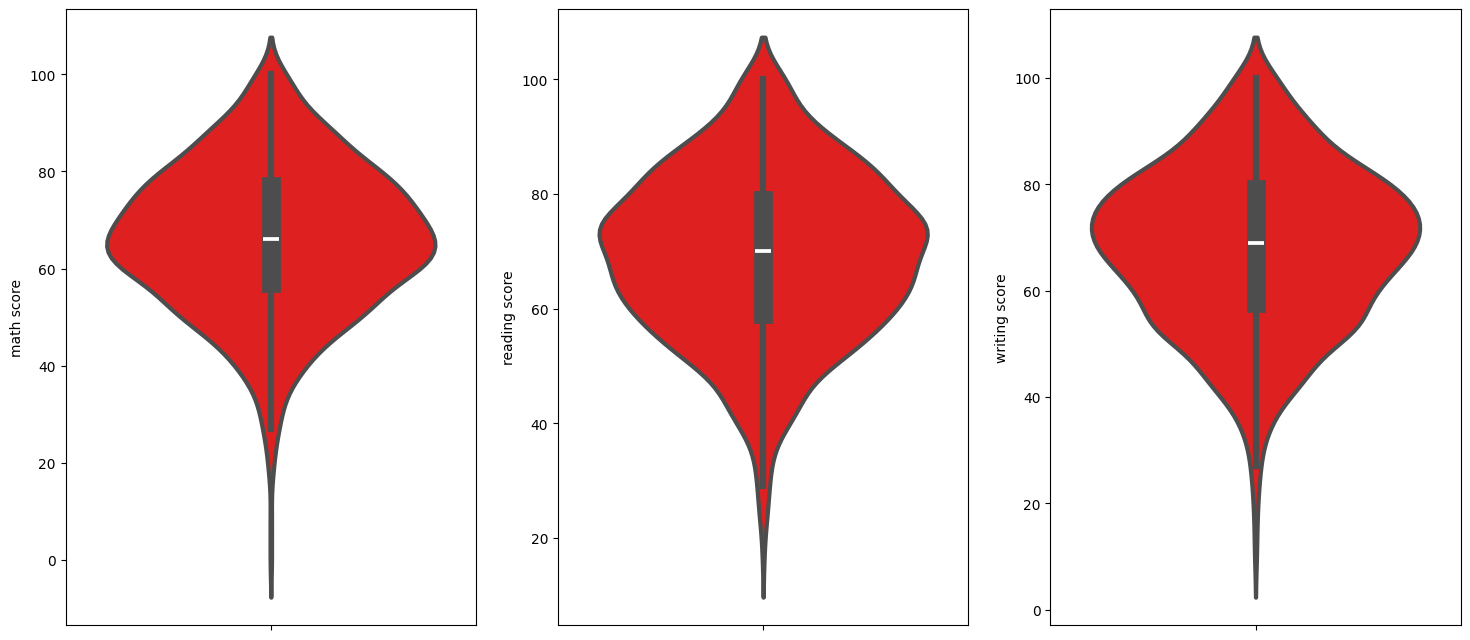

In [42]:
plt.subplots(1, 3, figsize=(18,8))
plt.subplot(131)
sns.violinplot(data=df, y='math score', color='red', linewidth=3)
plt.subplot(132)
sns.violinplot(data=df, y='reading score', color='red', linewidth=3)
plt.subplot(133)
sns.violinplot(data=df, y='writing score', color='red', linewidth=3)

##### Students scored mostly in the range of 60-80 in all 3 subs

#### Multivariate Analysis using pieplot

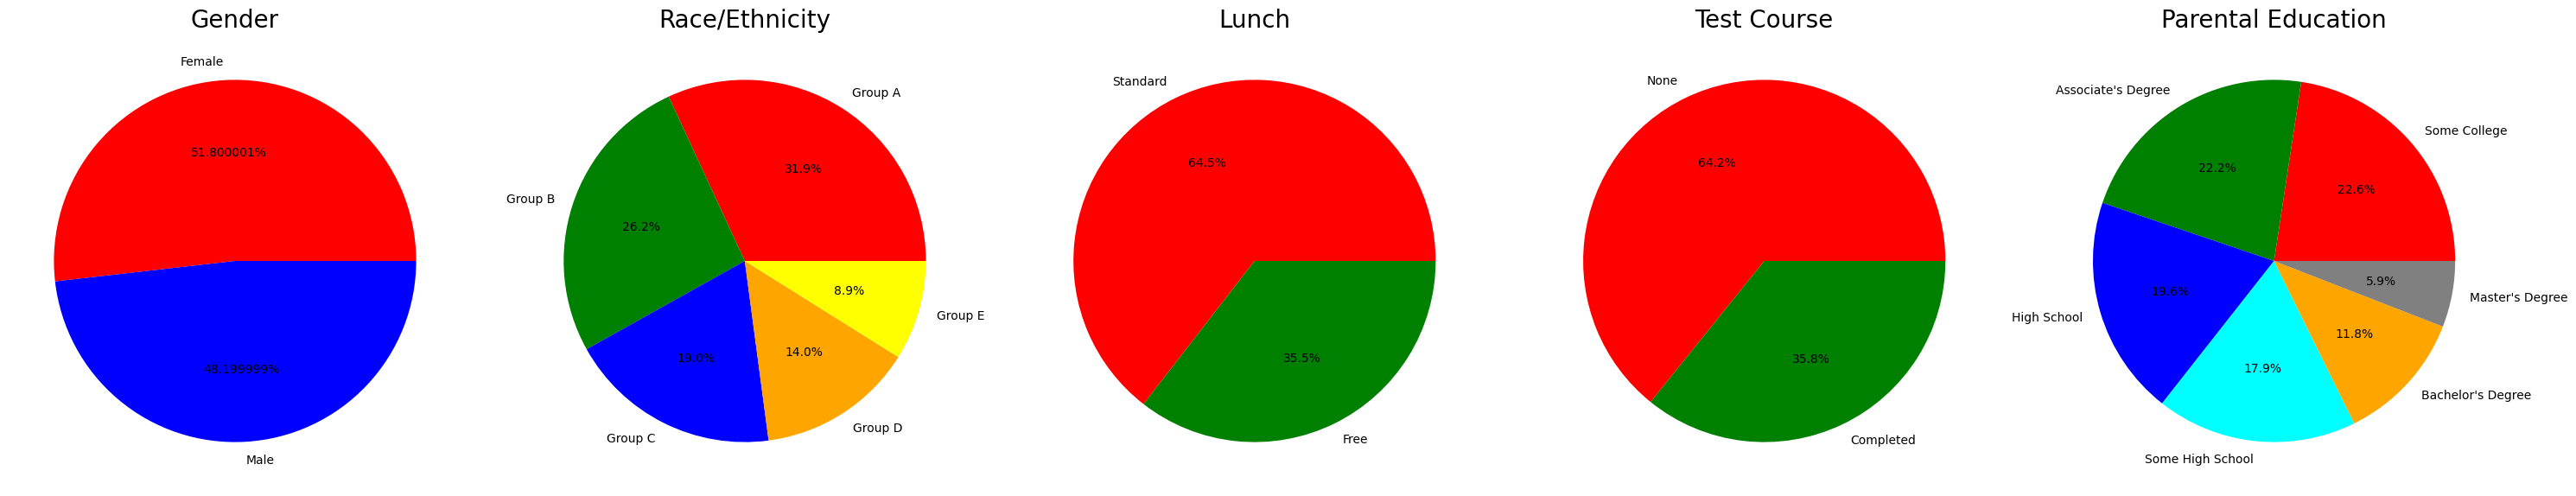

In [45]:
plt.rcParams['figure.figsize']=(30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'blue']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
#'%1.1f%%': Shows one decimal place (e.g., 25.0%).
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(152)
size = df['race/ethnicity'].value_counts()
label = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'orange', 'yellow']

plt.pie(size, colors=color, labels=label, autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(154)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(155)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

#### Feature Wise Visualization

#### 1. Gender
##### 1. Distribution of gender -- Univariate Analysis
##### 2. Any impact of gender on students performance? -- Bivariate Analysis

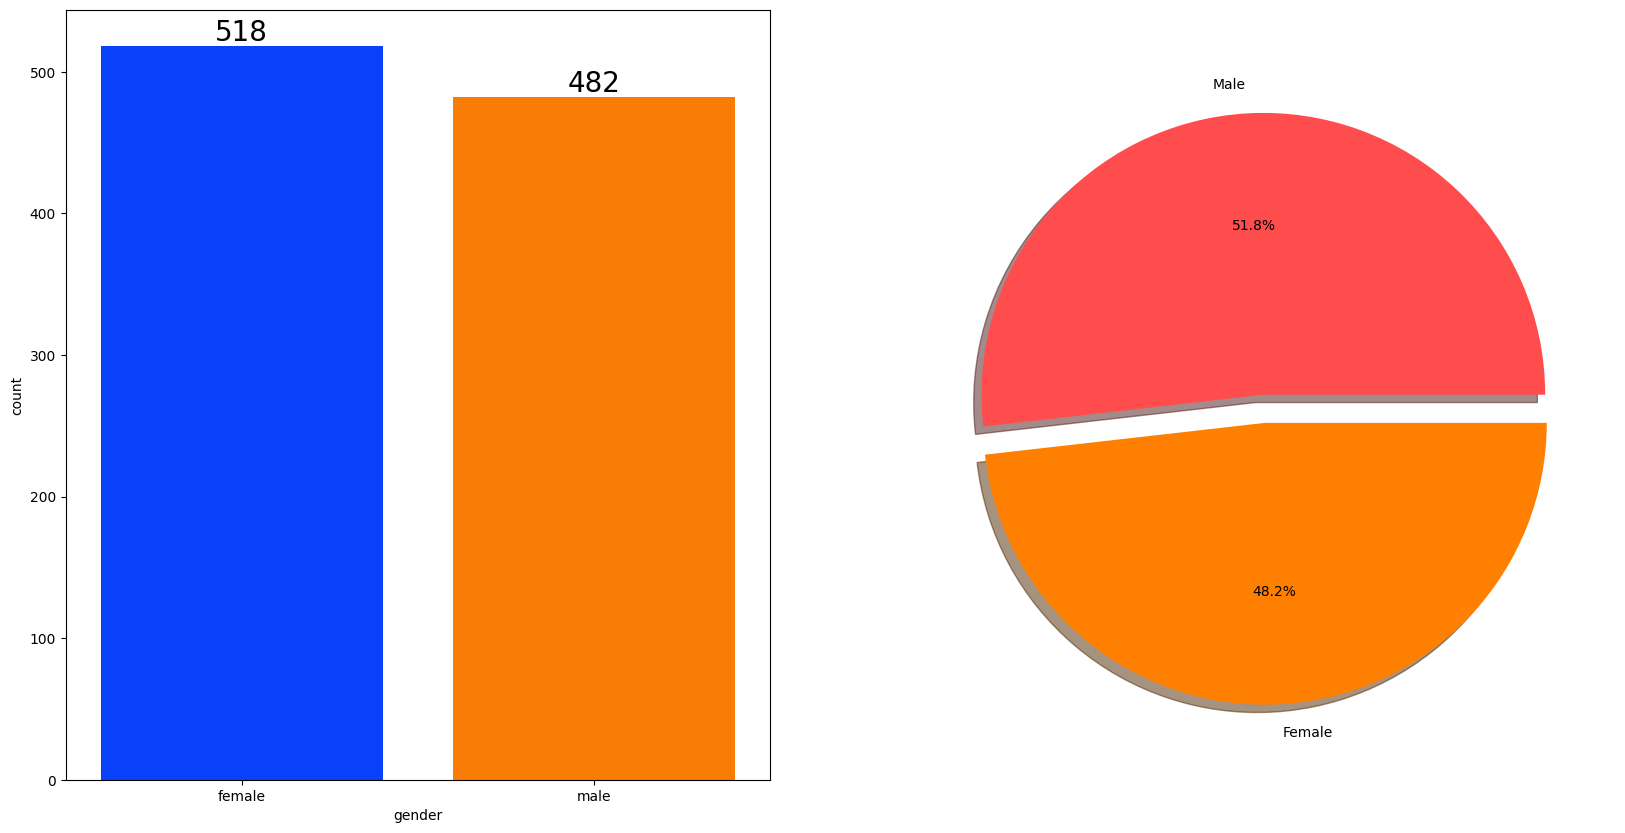

In [183]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette ='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], shadow=True, autopct='%1.1f%%', colors=['#ff4d4d','#ff8000']);

In [161]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


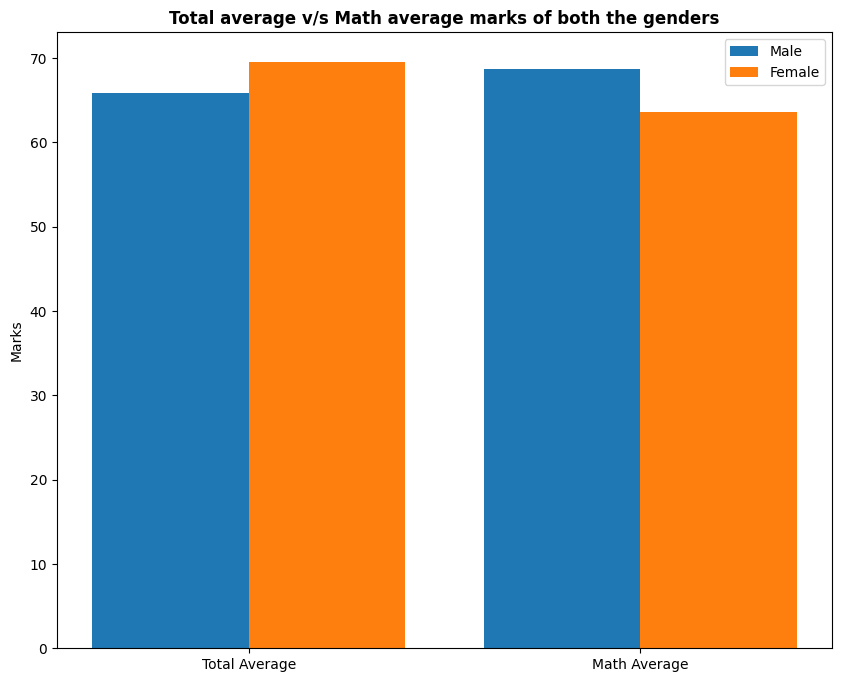

In [50]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

#### 2. Race/Ethnicity
##### 1. Group wise distribution
##### 2. Impact on student's performance?

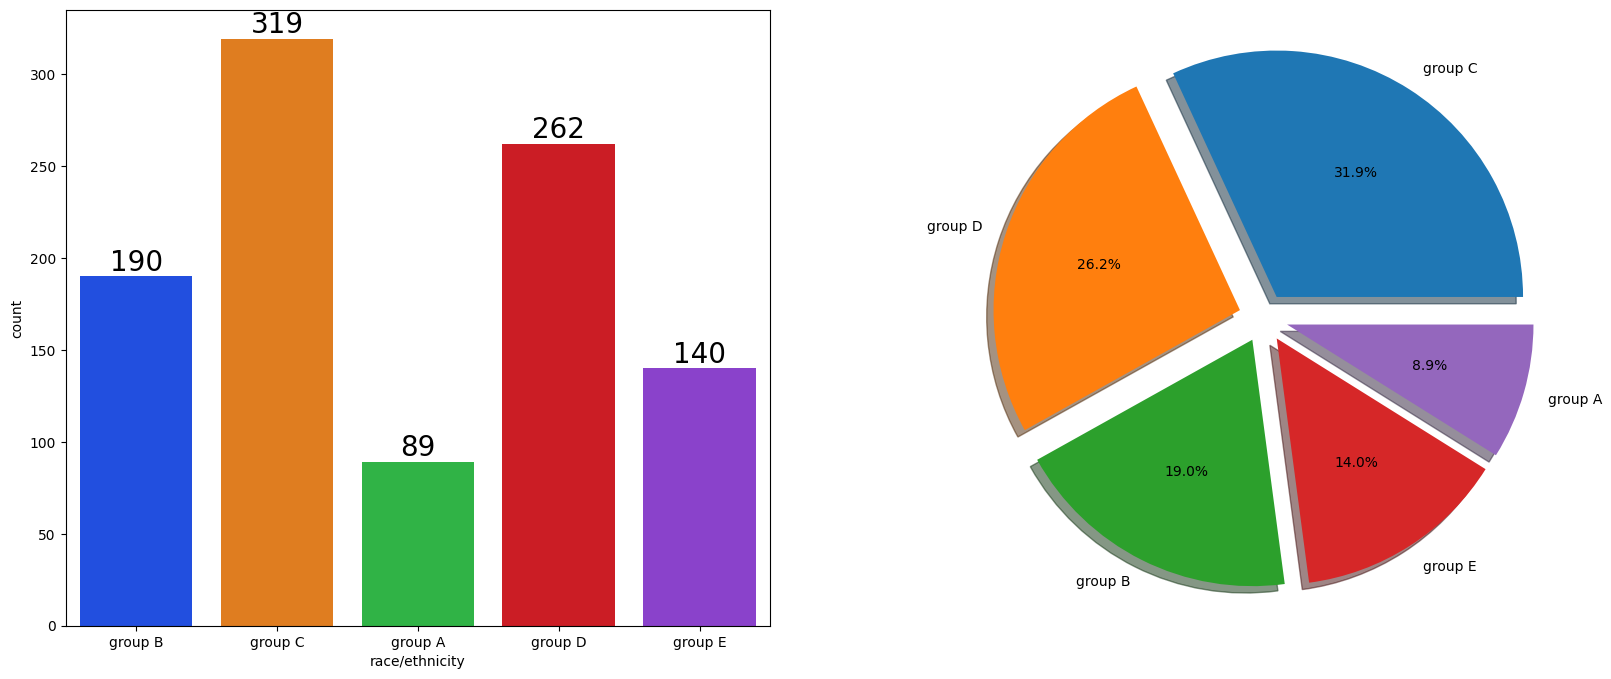

In [193]:
# Univariate Analysis
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(data=df, x=df['race/ethnicity'], palette='bright', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow=True);

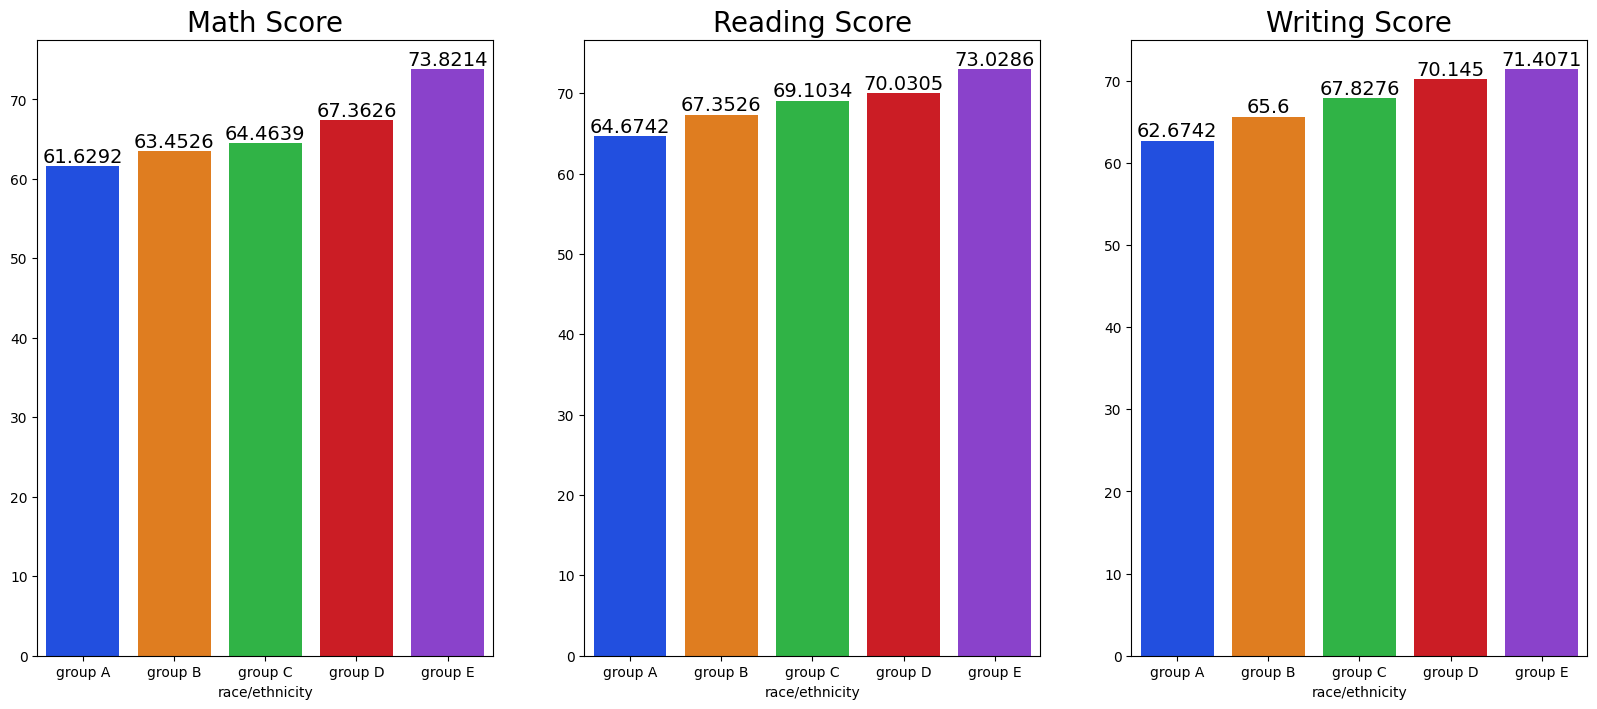

In [225]:
# Bivariate Analysis
group_data = df.groupby('race/ethnicity')

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=group_data['math score'].mean().index, y=group_data['math score'].mean().values, palette='bright', ax=ax[0])
ax[0].set_title('Math Score', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14, color='black')

sns.barplot(x=group_data['reading score'].mean().index, y=group_data['reading score'].mean().values, palette='bright', ax=ax[1])
ax[1].set_title('Reading Score', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14, color='black')

sns.barplot(x=group_data['writing score'].mean().index, y=group_data['writing score'].mean().values, palette='bright', ax=ax[2])
ax[2].set_title('Writing Score', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, size=14, color='black')

#### 3. Parental Level of Education
##### 1. educational bg of parent's?
##### 2. Impact on student's performance?

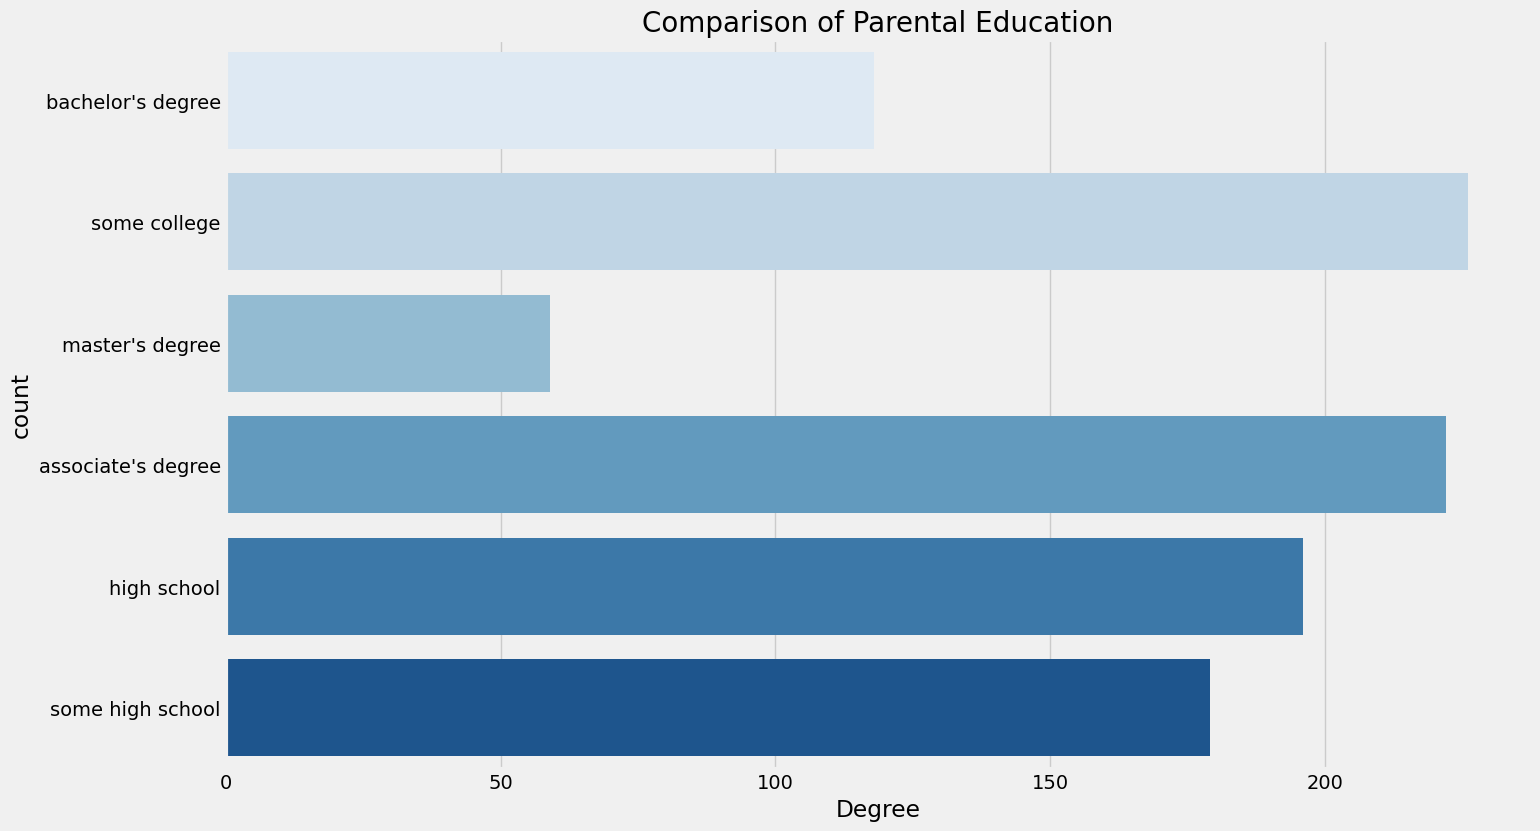

In [229]:
# Univariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### 4. Lunch
##### 1. common lunch?
##### 2. Impact on student's performance?

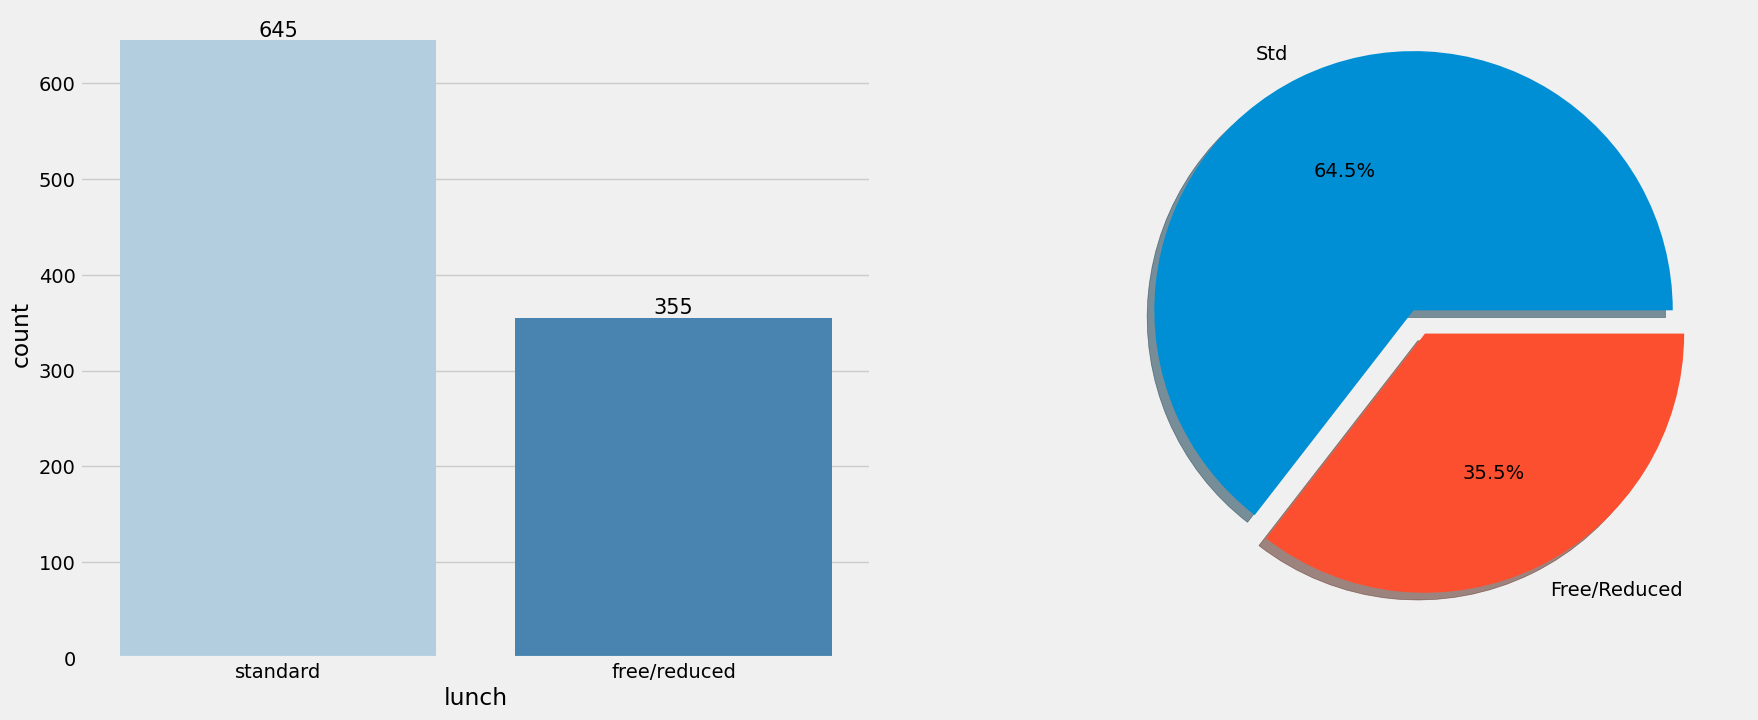

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(data=df, x=df['lunch'], palette='Blues', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size=15)

plt.pie(x=df['lunch'].value_counts(), shadow=True, explode=[0.1, 0], labels=['Std', 'Free/Reduced'], autopct='%1.1f%%');

#### 5. Test Preparation Course


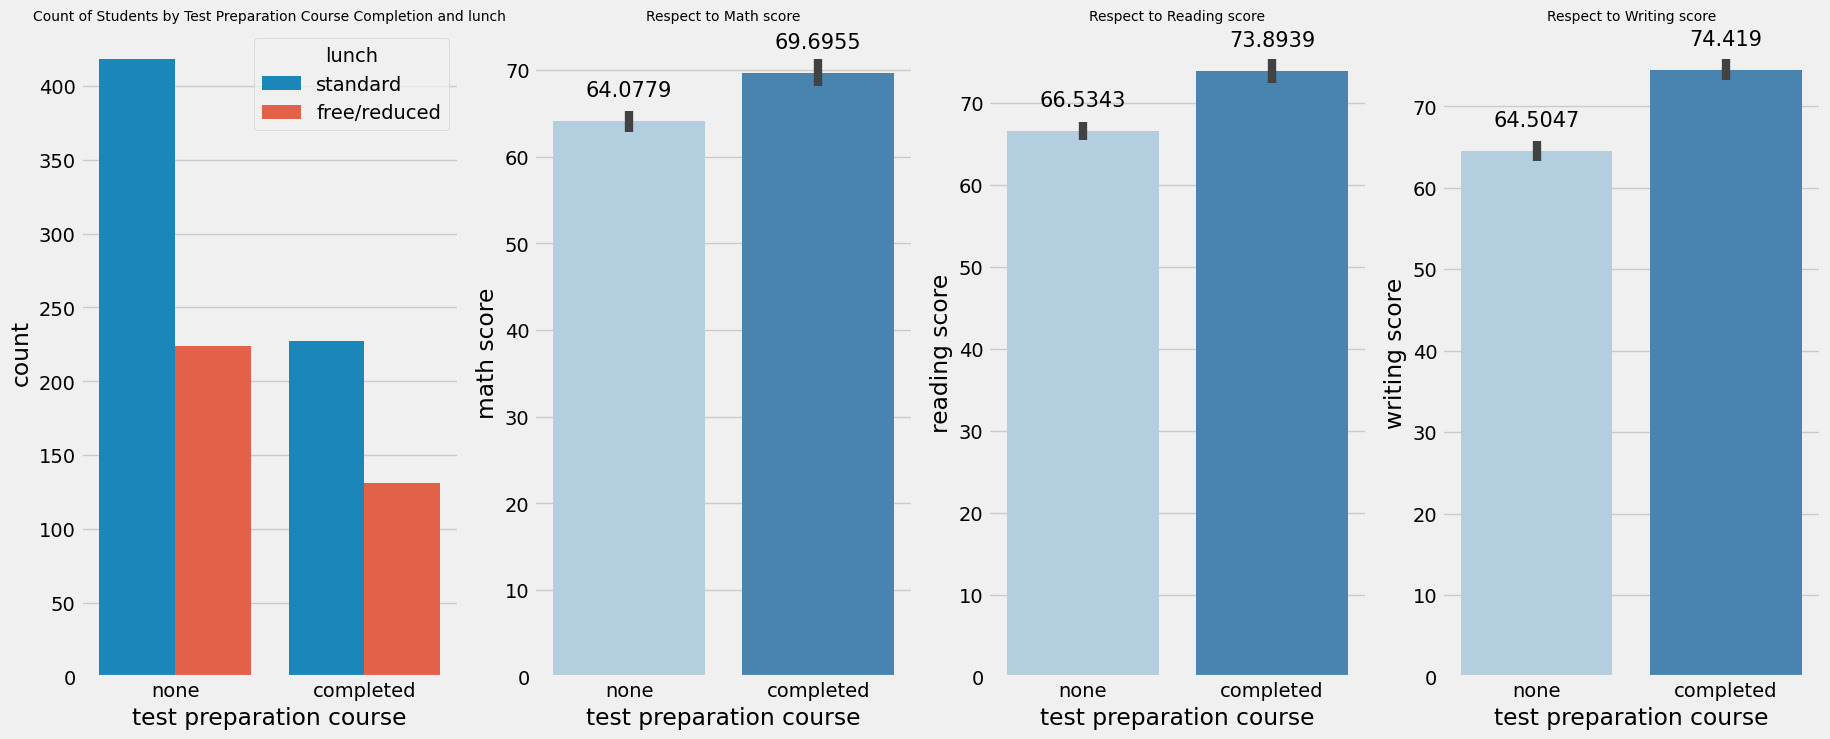

In [336]:
# Bivariate Analysis
fig, ax = plt.subplots(1, 4, figsize=(20,8))

sns.countplot(x='test preparation course', hue='lunch', data=df, ax=ax[0])
ax[0].set_title('Count of Students by Test Preparation Course Completion and lunch', size=10);

sns.barplot(x='test preparation course', y='math score', data=df, ax=ax[1], palette='Blues')
for container in ax[1].containers:
    ax[1].bar_label(container, size=15, padding=15)
ax[1].set_title('Respect to Math score', size=10);

sns.barplot(x='test preparation course', y='reading score', data=df, ax=ax[2], palette='Blues')
for container in ax[2].containers:
    ax[2].bar_label(container, size=15, padding=15)
ax[2].set_title('Respect to Reading score', size=10);
    
sns.barplot(x='test preparation course', y='writing score', data=df, ax=ax[3], palette='Blues')
for container in ax[3].containers:
    ax[3].bar_label(container, size=15, padding=15)
ax[3].set_title('Respect to Writing score', size=10);

plt.show()

##### 1. Completed stud have performed well
##### 2. math<reading<writing in completed

#### Checking outliers

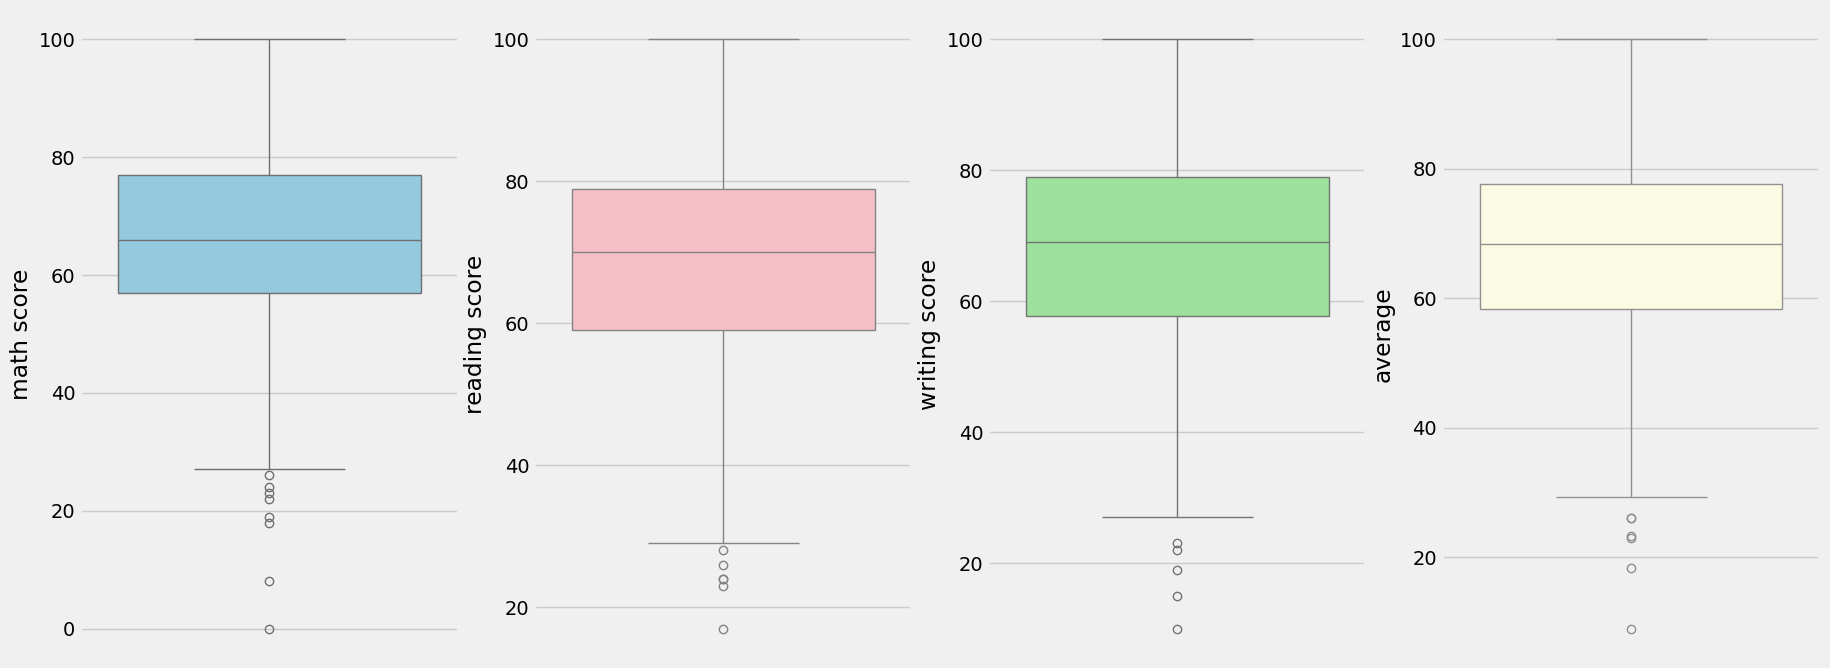

In [353]:
plt.subplots(1, 4, figsize=(20,8))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue');

plt.subplot(142)
sns.boxplot(df['reading score'], color='lightpink');

plt.subplot(143)
sns.boxplot(df['writing score'], color='lightgreen');

plt.subplot(144)
sns.boxplot(df['average'], color='lightyellow');

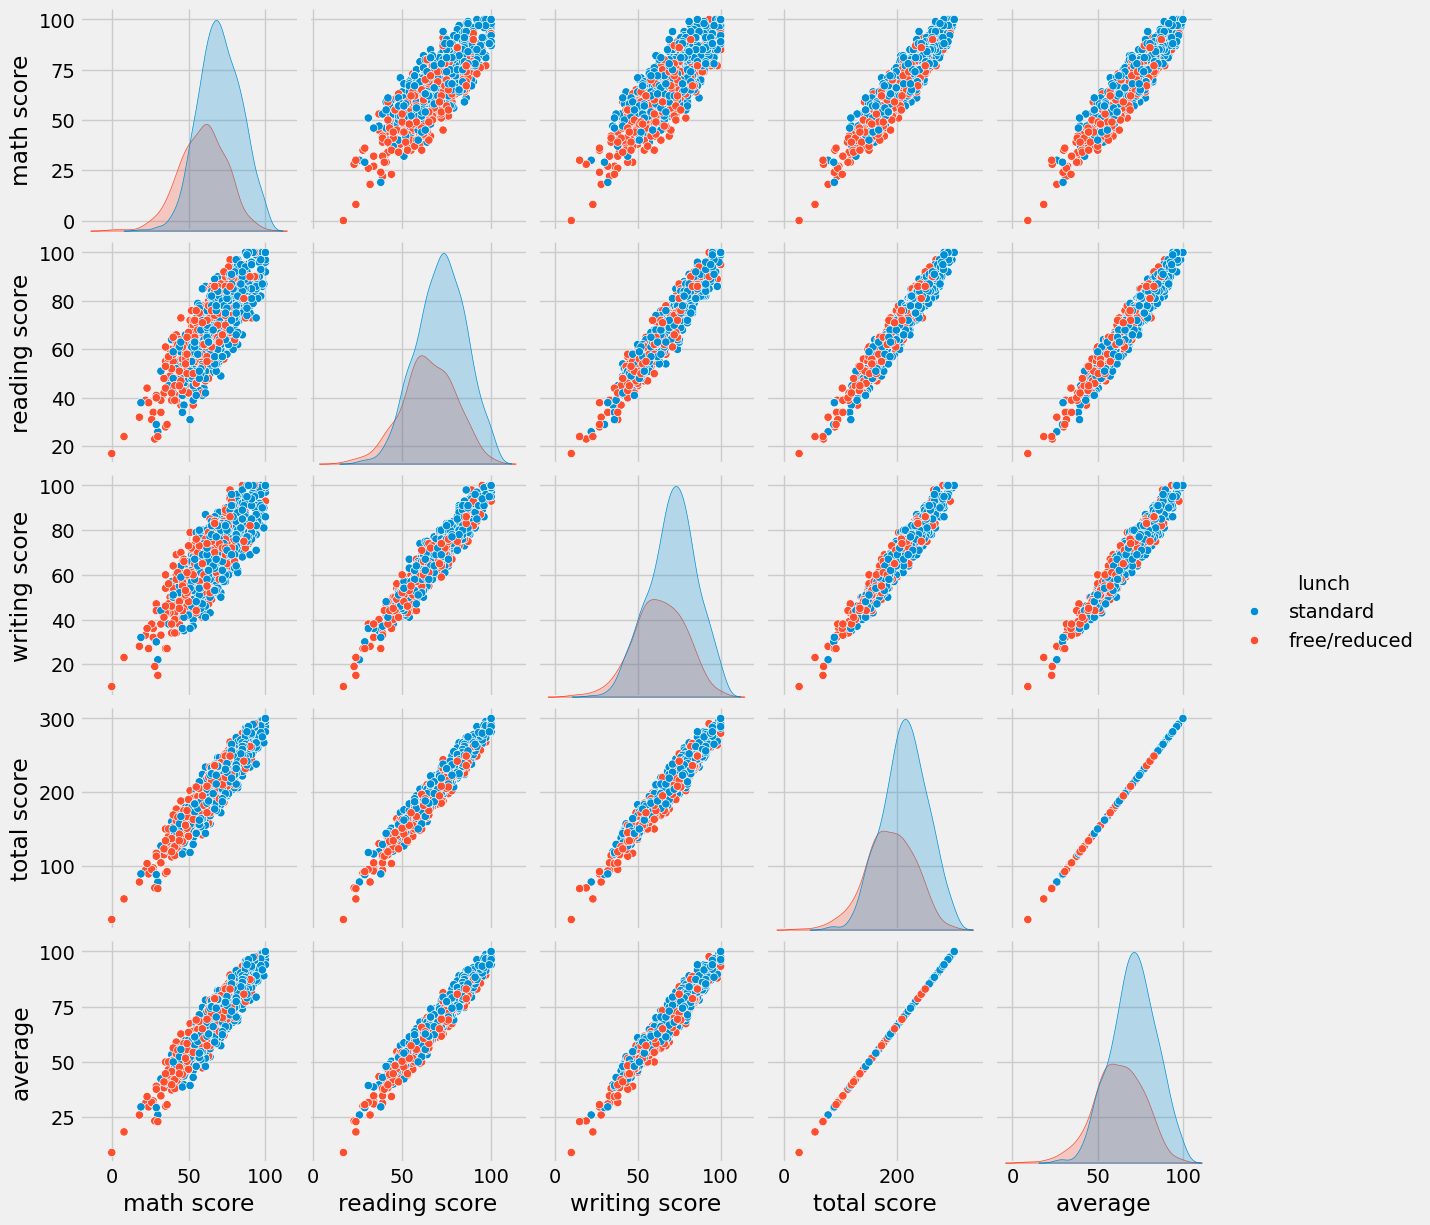

In [359]:
sns.pairplot(df,hue = 'lunch')
plt.show()